# Master the Most Time-consuming Task in DS/ML, Part I
## Dealing with common data problems
<img src='images/clean2.jpg'></img>
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://unsplash.com/@thecreative_exchange?utm_source=medium&utm_medium=referral'>Steve Johnson</a>
        on 
        <a href='https://unsplash.com/?utm_source=medium&utm_medium=referral'>Unsplash</a>
    </strong>
</figcaption>

### Introduction <small id='intro'></small>

### Setup <small id='setup'></small>

In [214]:
# Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('notebook')

For sample data, I will mostly be creating 'dirty' data myself and will be using some of the datasets from these two links which give a list of dirty datasets to practice: [Link 1](https://makingnoiseandhearingthings.com/2018/04/19/datasets-for-data-cleaning-practice/) and [Link 2](https://foresightbi.com.ng/microsoft-power-bi/dirty-data-samples-to-practice-on/). Definitely check out those datasets to flex your data cleaning muscles💪.

### Data Type Constraints <small id='type'></small>

Having the correct data type for each observation in the dataset is crucial. Generally, any data should belong to one of these types:
- `int` or `float` - numeric
- `str` - any text data
- `bool` - boolean (**True** or **False**)
- `datetime` - dates
- `category` - a finite set of values for one variable (do not confuse with string!)

If not dealt, incorrect data types may lead to misleading results during analyses and often go undetected.

One thing you should understand is that people who collect the data are not specialists in data engineering or any data-related fields and probably won't have a clue of what represents clean data. They do whatever it takes to record necessary information in as easy manner for them as possible. This will often result in human errors such as typos, adding unnecessary characters, representing the same information in many formats, etc.

The first common data problem is having numeric data as strings:

In [215]:
hospital = pd.read_excel('data/hospital.xlsx')
hospital.sample(5)

,Description,Basic Unit,Beginning Balance,Quantity Received,Quantity Dispensed,Losses and Adjustments,Ending Balance (Physical Count)
5243,I.V Metronidazole 200mg,Pcs,0,0,0,0,0
318,Tabs Ferrous sulphate 200mg,1000's,0,0,0,0,0
3853,Susp. Erythromycin 125mg/5ml,Bottle,0,0,0,0,0
2499,Tab. Losartan 25mg,30's,2500,0,0,0,0
4806,0.9% Normal saline 500mls,Pcs,31,0,20,0,11


A handy attribute of data frames is `dtypes` which allows for a quick overview of data types of all variables:

In [216]:
hospital.dtypes

Description                        object
Basic Unit                         object
Beginning Balance                  object
Quantity Received                  object
Quantity Dispensed                 object
Losses and Adjustments             object
Ending Balance (Physical Count)    object
dtype: object

`info` method offers the same information with some extra details:

In [217]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Description                      5846 non-null   object
 1   Basic Unit                       5846 non-null   object
 2   Beginning Balance                5846 non-null   object
 3   Quantity Received                5846 non-null   object
 4   Quantity Dispensed               5846 non-null   object
 5   Losses and Adjustments           5846 non-null   object
 6   Ending Balance (Physical Count)  5846 non-null   object
dtypes: object(7)
memory usage: 319.8+ KB


It is obvious that the data types for the last 5 columns are incorrect. Quantities should either be integers or floats but `pandas` imported them as string (object). It is possible that some of the numbers contain non-numeric characters which may lead to such problems. 

First of all, let's convert all the columns to lower and snake_case which allows for easier operations:

In [218]:
def clean_col_names(df):
    """
    Simple function to convert the column 
    names of a dataframe to snake_case and lower case.
    """
    # Get all the col names as lower and snake_case in a list
    new_col_names = [column.strip().replace(' ', '_').lower() for column in df.columns]
    # Rename the column names
    df.columns = new_col_names
    
    return df

In [219]:
hospital = clean_col_names(hospital)
hospital.columns

Index(['description', 'basic_unit', 'beginning_balance', 'quantity_received',
       'quantity_dispensed', 'losses_and_adjustments',
       'ending_balance_(physical_count)'],
      dtype='object')

Now, let's store the columns with incorrect data types in a list:

In [220]:
incorrect = [
    'beginning_balance', 'quantity_received', 'quantity_dispensed',
    'losses_and_adjustments', 'ending_balance_(physical_count)'
]

Converting columns to numeric data type is easy using `pd.to_numeric`:

In [221]:
for col in incorrect:
    hospital[col] = pd.to_numeric(hospital[col], errors='coerce')

The function has `errors` parameter which lets us control what happens to values that do not convert to numeric. If set to `coerce`, `pandas` puts `NaN`s in place of inconsistent values. Check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html) of the function for more details.

In [222]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   description                      5846 non-null   object 
 1   basic_unit                       5846 non-null   object 
 2   beginning_balance                5844 non-null   float64
 3   quantity_received                5839 non-null   float64
 4   quantity_dispensed               5842 non-null   float64
 5   losses_and_adjustments           5845 non-null   float64
 6   ending_balance_(physical_count)  5842 non-null   float64
dtypes: float64(5), object(2)
memory usage: 319.8+ KB


As you see, we have the columns in the correct format and very few of the observations were converted to `NaN`s. How we deal with them is an entirely another topic and probably, I will discuss them in future articles.

Note that I chose to drop the inconsistent values because there were only few of them and each case was unique. In such situations, if you try to correct them individually, it will be a huge time-suck and lots of frustration. However, if there are some patterns as to why some values are inconsistent, you should try to deal with them using custom functions and methods.

Another common problem is having categorical data represented as strings or integers. For example, let's say I have a data frame containing the marriage status of 1000 people. If I choose the status as integers 0, 1, 2 `pandas` by default interprets or imports them as integers:

In [230]:
# Create a sample data for illustration
df = pd.DataFrame(np.random.choice([0, 1, 3], 1000), columns=['marriage_status'])
df.marriage_status.sample(5)

795    1
959    1
98     1
770    3
172    0
Name: marriage_status, dtype: int32

Having categories represented as numeric will lead to misleading results during the analysis:

In [231]:
df.describe()

,marriage_status
count,1000.000000
mean,1.358000
std,1.271004
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,3.000000


As `pandas` is treating the `marriage` as a numeric data type, `describe` gives us summary statistics which is not what we want. Let's set the column as categorical and call `describe` once again:

In [233]:
df['marriage_status'] = df['marriage_status'].astype('category') # set as a categorical
df.describe()

,marriage_status
count,1000
unique,3
top,3
freq,350


There is also the case where categories are given as strings. Even though it is not a big issue for our marriage status column, it certainly is when there are multiple categories and they have a particular ordering. 

For instance, let's say there is a column in the data source which categorizes the car size into 5: small, medium small, medium, medium large, large. If you import the file, `pandas` will definitely read them as strings. For such cases, setting the column as categorical is not enough, you should also define the order:

In [234]:
# Create a sample data for illustration
df = pd.DataFrame(np.random.choice(
    ['medium small', 'small', 'medium large', 'large', 'medium',], 5000, p=[0.2, 0.3, 0.1, 0.15, 0.25]),
                  columns=['car_size'])
df.dtypes

car_size    object
dtype: object

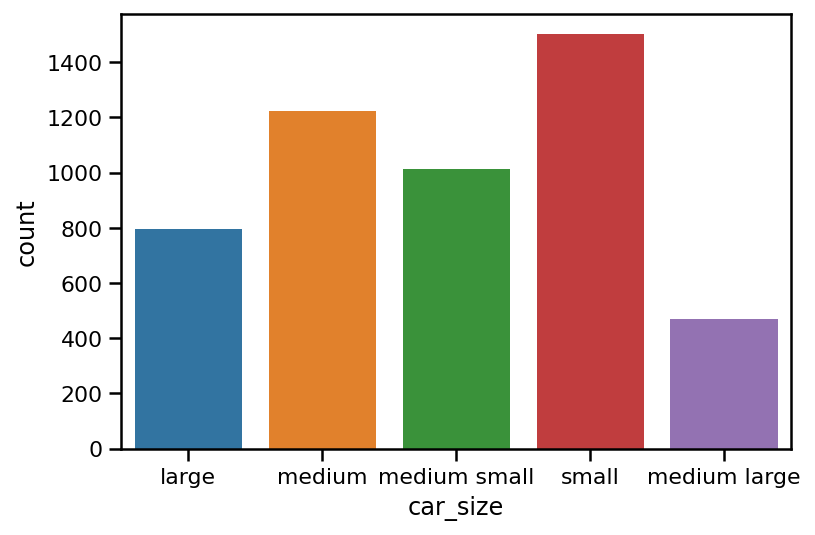

In [235]:
sns.countplot(df['car_size']);

You can see that in a count plot, the results can be misleading if you don't set the categories straight.

In [236]:
# Create the list of ordered categories
order = ['small', 'medium small', 'medium', 'medium large', 'large']

# Setting as categorical with order
df['car_size'] = pd.Categorical(df['car_size'], categories=order, ordered=True)
df.dtypes

car_size    category
dtype: object

For categorical data that requires more control, use `pd.Categorical`. Its first argument should be an array-like object like data frame column and you should pass the categories to `categories` setting `ordered` to True.

The same count plot:

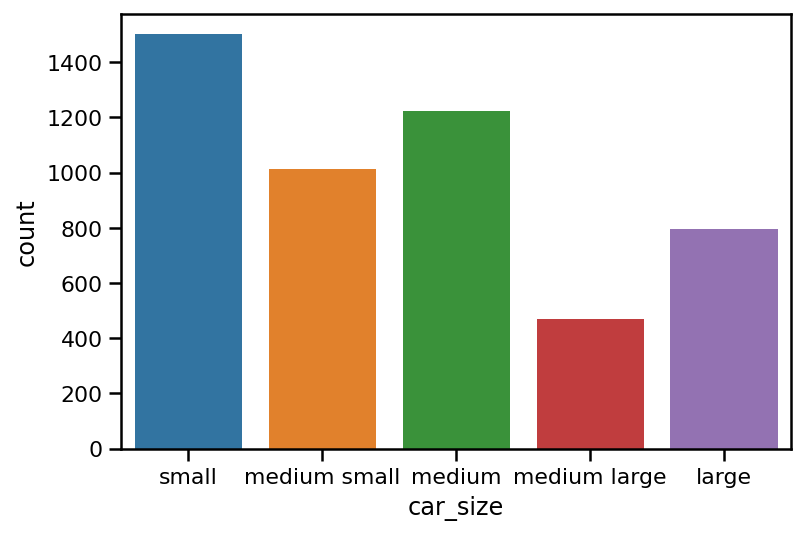

In [237]:
sns.countplot(df['car_size']);

Now, the categories are in the right order.

### Data Range Constraints <small id='range'></small>

Another class of data problems is related to data ranges. Often, these problems can be seen with date and numeric data. For example, dates in the future, over 100-110 and negative age of a person, or any other value that does not make sense based on the real-world or business assumptions. 

For example, if you have a dataset of movies containing their rating up to 5 and the ratings were over that threshold, it is a potential issue:

In [245]:
# Create a sample of 1000 movie ratings
movies = pd.DataFrame(np.random.choice([1, 2, 3, 4, 5, 6],
                                       size=1000,
                                       p=[0.15, 0.15, 0.2, 0.20, 0.25, 0.05]),
                      columns=['movie_rating'])
movies.sample(5)

,movie_rating
762,5
546,4
215,2
711,2
145,5


To spot data range errors for numeric data, histograms are very useful:

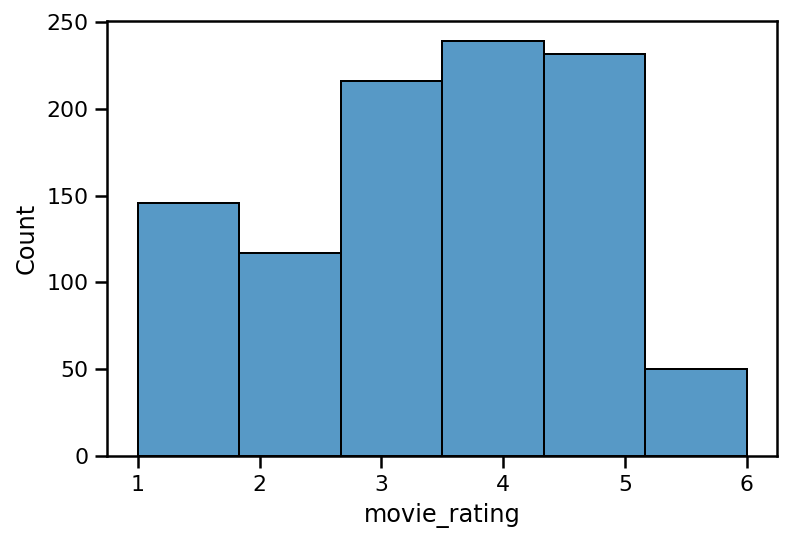

In [246]:
sns.histplot(movies['movie_rating'], bins=6);

In our fake data, we can see that there are some movies with ratings above 5. 

### Uniqueness Constraints <small id='unique'></small>